# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 500)

/Users/paromasoni/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv ("craftcans.csv", na_values = ['Does not apply'])
df.head(10)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60%,47.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
8,35 K,Against the Grain Brewery,"Louisville, KY",Milk / Sweet Stout,16 oz.,7.70%,25.0
9,A Beer,Against the Grain Brewery,"Louisville, KY",American Pale Ale (APA),16 oz.,4.20%,42.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.2+ KB


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [4]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
SanTan Brewing Company        19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [5]:
df.ABV.mode()

0    5.00%
dtype: object

In [6]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df.ABV.head()

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [8]:
#df[df.ABV.isnull()]

In [9]:
#df.dropna(subset=['ABV'])


In [10]:
df.ABV = df.ABV.str.replace('%', "")
#df.head()

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [11]:
df.ABV = df.ABV.astype(float)
df.head()
df.dtypes


Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs        float64
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [12]:
df.ABV.mean()

5.977342419080068

In [13]:
df.ABV.median()

5.6

<AxesSubplot:>

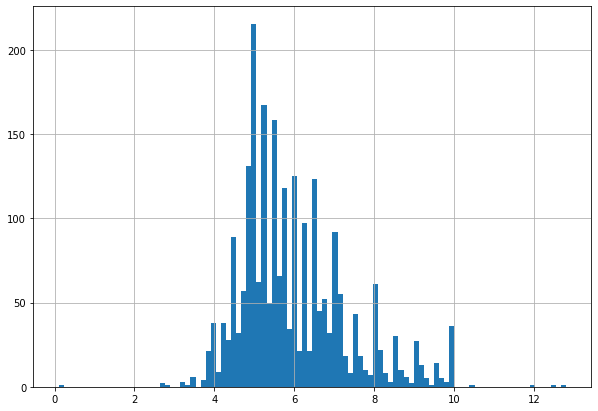

In [14]:
df.ABV.hist(bins=100, figsize = (10,7))

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [15]:
df[df.ABV.isnull()]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,NaN
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,NaN
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,NaN
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,NaN
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,NaN
217,U. P. Witbier,Keweenaw Brewing Company,"Houghton, MI",Witbier,12 oz.,NaN,NaN
307,Fat Paczki,Brewery Vivant,"Grand Rapids, MI",Belgian Dark Ale,16 oz.,NaN,NaN
308,Earth-Like Planets,Brewery Vivant,"Grand Rapids, MI",Belgian Pale Ale,16 oz.,NaN,NaN
324,Royal Lager,Weston Brewing Company,"Weston, MO",American Pale Lager,16 oz.,NaN,NaN
344,O’Malley’s Stout,Weston Brewing Company,"Weston, MO",English Stout,12 oz.,NaN,NaN


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [16]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


In [17]:
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [18]:
df[df.Location == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most cans of beer?

In [19]:
brooklyn = df.Brewery[df.Location == 'Brooklyn, NY']
brooklyn.value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [20]:
df.Style[df.Brewery =='Sixpoint Craft Ales'].sort_values(ascending=False).head(5)

1971    Saison / Farmhouse Ale
1269                  Rye Beer
2142                  Rye Beer
2074               Pumpkin Ale
210                       Gose
Name: Style, dtype: object

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [21]:
df = df.dropna(subset=['Location'])
#df.head()

In [22]:
#df[df.Location.isnull()]

In [23]:
df[df.Location.str.contains('NY')]


,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


### Now *count* all of the breweries in New York state

In [24]:
df.Brewery[df.Location.str.contains('NY')].count()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [25]:
df[df.Style.isnull()]
df = df.dropna(subset=['Style'])
df[(df.Style.str.contains('IPA')) | (df.Beer.str.contains('IPA'))]

#This contains beers with "IPA" in their names OR styles listed as IPA, because this one was a higher number than using AND. Running the next command to verify

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


In [26]:
df[(df.Beer.str.contains('IPA')) & (~df.Style.str.contains('IPA')) ]

#There are a few beers listed as IPA in their name but not in the style, which is weird. I don't know whether to include them or not so making a separate command.

,Beer,Brewery,Location,Style,Size,ABV,IBUs
320,Black Hop IPA,Shebeen Brewing Company,"Wolcott, CT",American Black Ale,12 oz.,6.8,NaN
374,Mothman Black IPA,Greenbrier Valley Brewing Company,"Lewisburg, WV",American Black Ale,12 oz.,6.7,71.0
459,Dark Voyage Black IPA (2013),Capital Brewery,"Middleton, WI",American Black Ale,12 oz.,6.5,80.0
1099,Next Adventure Black IPA,Fort George Brewery,"Astoria, OR",American Black Ale,16 oz.,6.2,NaN
1123,Masked Bandit IPA,Piney River Brewing Company,"Bucryus, MO",American Black Ale,16 oz.,7.0,NaN
1182,CAPT Black IPA,Ruhstaller Beer Company,"Sacramento, CA",American Black Ale,12 oz.,7.3,55.0
1223,Stone's Throw IPA,Fargo Brewing Company,"Fargo, ND",Scottish Ale,12 oz.,4.5,19.0
1246,Heavy Machinery IPA Series #1: Heavy Fist,Austin Beerworks,"Austin, TX",American Black Ale,16 oz.,7.0,NaN
1264,Sanitas Black IPA,Sanitas Brewing Company,"Boulder, CO",American Black Ale,12 oz.,6.8,65.0
1675,Black IPA,Santa Fe Brewing Company,"Santa Fe, NM",American Black Ale,12 oz.,7.1,95.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [27]:
#df.IBUs.mean()

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [28]:
df.IBUs.mean()

42.73984319315752

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

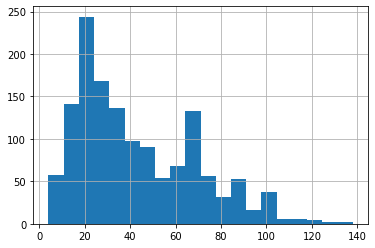

In [29]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [30]:
df.Beer[df.IBUs > df.IBUs.quantile(0.75)]

6                                   Citra Ass Down
7                                   London Balling
14                                     Rico Sauvin
17                                    Pile of Face
21                                      Excess IPL
22                                  Hoponius Union
24                                  Habitus (2014)
25                                           Solis
27                                         Habitus
46                             Yeti Imperial Stout
59               98 Problems (Cuz A Hop Ain't One)
62                                    Train Hopper
68                                            Csar
69                                  Saucy Intruder
79                                      The Gadget
89                                      Gone A-Rye
93                                   Heavy Lifting
110                                        Jah Mon
123                                 Flying Mouse 4
149                            

In [31]:
df[df.IBUs > df.IBUs.quantile(0.75)]
#For details of all the beers with IBUs over 75th percentile

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0


## List all of the beers with IBUs below the 25th percentile

In [32]:
df.Beer[df.IBUs < df.IBUs.quantile(0.25)]

2                                        Wall's End
12                                         Sho'nuff
13                                      Bloody Show
18                                   The Brown Note
19                                      House Lager
20                                     Leisure Time
30                                             Park
31                                        Westfalia
32                                              KSA
54                                          Sparkle
56                                     Hotbox Brown
57                                             Gold
66                                       Cafe Leche
67                           Damascene Apricot Sour
90                                      Sex Panther
102                                  Vanilla Porter
105                                            Gose
106                                 Vermont Pilsner
134                             Ginger Peach Saison
139         

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [33]:
df.groupby('Style').IBUs.median().sort_values(ascending=False)

Style
American Barleywine                    96.0
Russian Imperial Stout                 94.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Black Ale                     73.0
Belgian Strong Dark Ale                72.0
American Strong Ale                    70.0
American IPA                           69.0
English Stout                          66.0
American India Pale Lager              65.0
Belgian IPA                            61.0
English Barleywine                     60.0
Rye Beer                               57.0
Baltic Porter                          52.0
English Strong Ale                     52.0
American Double / Imperial Stout       51.0
English India Pale Ale (IPA)           47.0
American White IPA                     45.0
American Pale Ale (APA)                44.0
Extra Special / Strong Bitter (ESB)    41.0
California Common / Steam Beer         41.0
Old Ale                                40.0
American Stout            

<AxesSubplot:ylabel='Style'>

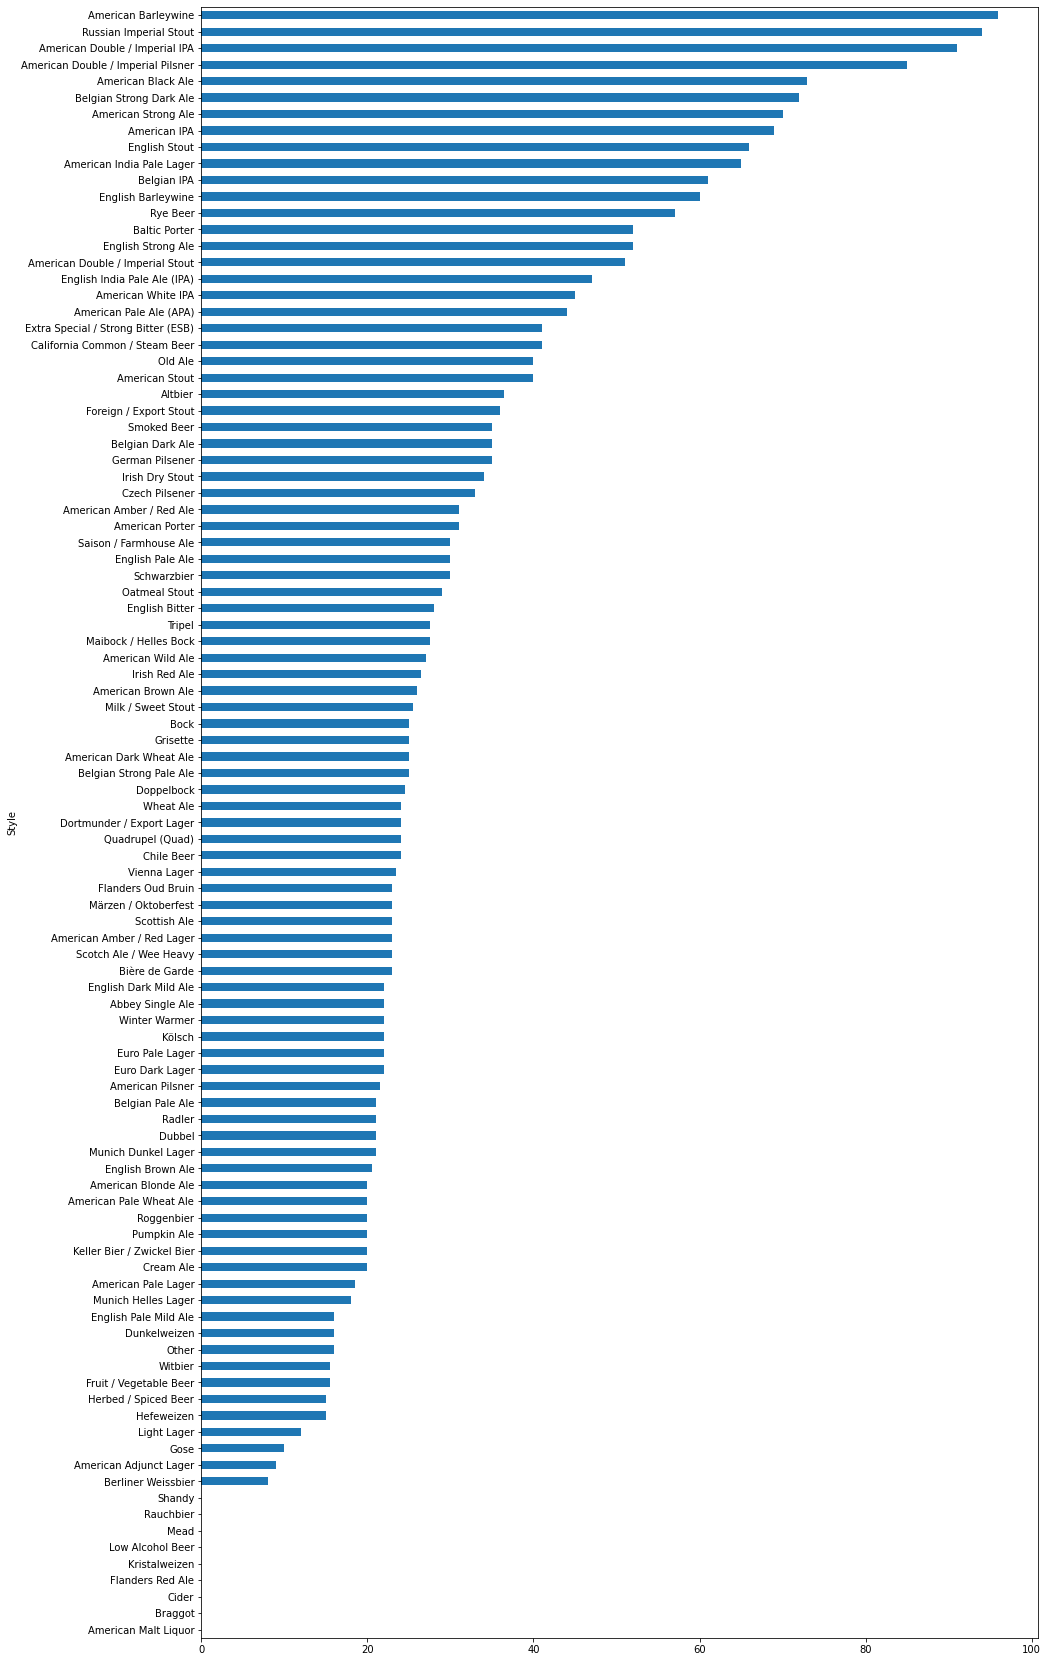

In [34]:
df.groupby('Style').IBUs.median().sort_values(na_position='first').plot(
kind='barh',
figsize=(15,30))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [35]:
df.Beer[df.IBUs > df.IBUs.quantile(0.75)].value_counts().head(5)

Dale's Pale Ale                 6
Dagger Falls IPA                3
Hop Slayer Double IPA (2011)    2
Torpedo                         2
Tsunami IPA                     2
Name: Beer, dtype: int64

In [36]:
df.Beer[df.IBUs < df.IBUs.quantile(0.25)].value_counts().head(5)

Nonstop Hef Hop           12
Longboard Island Lager     4
Point Special              2
#9                         2
Bombshell Blonde           2
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- Tip: I hope that `isin` is in your toolbox

In [37]:
#Average IBU of wheat beers

wheat = df[df.Style.isin(['Witbier','Hefeweizen','American Pale Wheat Ale'])]
wheat.IBUs.mean()

18.982142857142858

In [38]:
#Average IBUs of each of the different types of wheat beers (not sure which one was required)

wheat.groupby('Style').IBUs.mean()

Style
American Pale Wheat Ale    20.688525
Hefeweizen                 17.592593
Witbier                    16.208333
Name: IBUs, dtype: float64

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

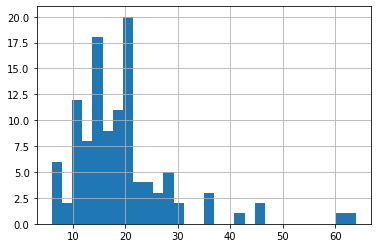

In [39]:
wheat.IBUs.hist(bins=30)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [40]:
IPA = df[(df.Style.str.contains('IPA'))]
df[df.isin(IPA)].IBUs.mean()

71.94897959183673

<AxesSubplot:>

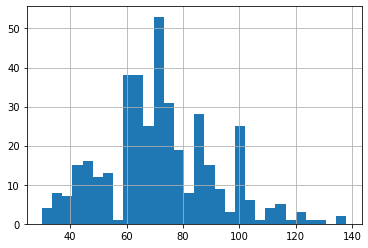

In [41]:
df[df.isin(IPA)].IBUs.hist(bins=30)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

<AxesSubplot:>

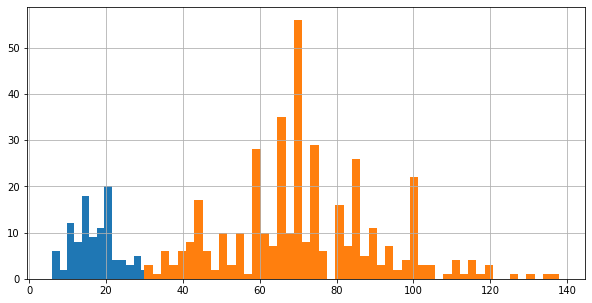

In [42]:
ax = wheat.IBUs.hist(bins=30)
df[df.isin(IPA)].IBUs.hist(ax=ax,bins=50, figsize= (10,5))

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [43]:
wheat.ABV.mean()

5.043715846994536

In [44]:
df[df.isin(IPA)].ABV.mean()

6.879285714285715

## Good work!

If you made it this far you deserve a drink.